In [50]:
import pandas as pd 

data = pd.read_csv("numbers.csv") 


## Base Pattern nested

Bughunt 1:

```js
const sauerkrautJar = await ferment(
  salt(
    new Jar(
      pound(
        cut(
          wash("cabbage")
        )
      )
    )
  )
);
const sauerkraut = sauerkrautJar.takeOne();

// Error: No day length provided
```

Bughunt 2:

```js
const sauerkrautJar = ferment(
  salt(
    new Jar(
      pound(
        cut(
          wash("cabbage")
        )
      )
    )
  ), 14
);
const sauerkraut = sauerkrautJar.takeOne();

// Error: sauerkrautJar.takeOne is not a function
```

Bughunt 3:

```js
const sauerkrautJar = await ferment(
  salt(
    new Jar
      pound(
        cut(
          wash("cabbage")
        )
      )
    )
  ), 14
);
const sauerkraut = sauerkrautJar.takeOne();

// SyntaxError: unexpected token: ')'
```

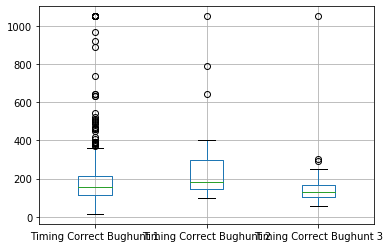

In [52]:
columns = ['Timing Correct Bughunt 1', 'Timing Correct Bughunt 2', 'Timing Correct Bughunt 3']
threshold_upper = 1050
threshold_lower = 0

for column in columns:
    data[column] = data[column].clip(upper=threshold_upper, lower=threshold_lower)
    data[column].dropna()



boxplot = data.boxplot(column=columns)

## Base Pattern Flattened

Bugunt 4:
```js
const washedCabbage = wash("cabbage");
const cutCabbage = cut(washedCabbage);
const crushedCabbage = pound(cutCabbage);
const cabbageJar = new Jar(crushedCabbage);
const saltyCabbageJar = salt(cabbageJar);
const sauerkrautJar = await ferment(saltCabbageJar, 14);
const sauerkraut = sauerkrautJar.takeOne();

// Error: saltCabbageJar is undefined
```

Bughunt 5:
```js
const washedCabbage = wash("cabbage");
const cutCabbage = cut(washedCabbage);
const crushedCabbage = pound(cutCabbage);
const cabbageJar = new Jar(crushedCabbage);
const saltyCabbageJar = salt(cabbageJar);
const sauerkrautJar = ferment(saltyCabbageJar, 14);
const sauerkraut = sauerkrautJar.takeOne();

// Error: sauerkrautJar.takeOne is not a function
```

Bughunt 6:
```js
const washedCabbage = wash("cabbage");
const cutCabbage = cut(washedCabbage);
const crushedCabbage = poundcutCabbage);
const cabbageJar = new Jar(crushedCabbage);
const saltyCabbageJar = salt(cabbageJar);
const sauerkrautJar = await ferment(saltyCabbageJar, 14);
const sauerkraut = sauerkrautJar.takeOne();

// SyntaxError: unexpected token: ')'
```

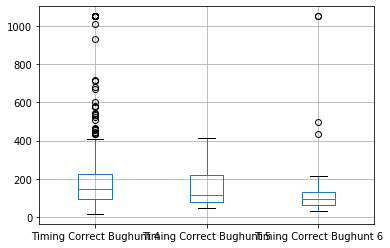

In [53]:
columns = ['Timing Correct Bughunt 4', 'Timing Correct Bughunt 5', 'Timing Correct Bughunt 6']
threshold_upper = 1050
threshold_lower = 0

for column in columns:
    data[column] = data[column].clip(upper=threshold_upper, lower=threshold_lower)
    data[column].dropna()



boxplot = data.boxplot(column=columns)

## Proposal 1 variations

Bughunt 8:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> new Jar(#);
  |> add("water", #)
  |> salt
  |> ferment(#, 2)
  |> await #
  |> #.takeOne()

// SyntaxError: unexpected token `|`
```

Bughunt 9:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> new Jar
  |> add("water", #)
  |> salt
  |> ferment(#, 14)
  |> await #
  |> #.takeOne()

// Error: Jar must be instantiated with an initial ingredient
```

Bughunt 10:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> new Jar(#)
  |> add("water", #)
  |> salt
  |> ferment
  |> await #
  |> #.takeOne()

// Error: No day length provided
```

Bughunt 11:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> new Jar(#)
  |> add("water", #)
  |> salt()
  |> ferment(#, 2)
  |> await #
  |> #.takeOne()

// SyntaxError: `#` is undefined
```

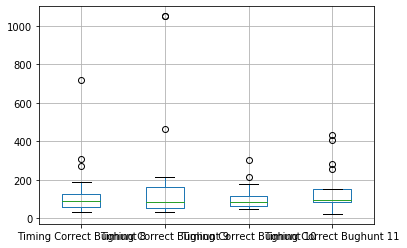

In [57]:
columns = ['Timing Correct Bughunt 8', 'Timing Correct Bughunt 9', 'Timing Correct Bughunt 10', 'Timing Correct Bughunt 11']
threshold_upper = 1050
threshold_lower = 0

for column in columns:
    data[column] = data[column].clip(upper=threshold_upper, lower=threshold_lower)
    data[column].dropna()



boxplot = data.boxplot(column=columns)

## Proposal 2 Variations

Bughunt 12:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> (_ => new Jar(_)
  |> salt
  |> (_ => ferment(_, 14))
  |> await
  |> (_ => _.takeOne())

// SyntaxError: missing ) in parenthetical
```


Bughunt 13:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> (_ => new Jar(_));
  |> salt
  |> (_ => ferment(_, 14))
  |> await
  |> (_ => _.takeOne())

// SyntaxError: Unexpected token `|`
```

Bughunt 14:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> (_ => {new Jar(_)})
  |> salt
  |> (_ => {ferment(_, 14)})
  |> await
  |> (_ => {_.takeOne()})


// Error: jar is undefined
```

Bughunt 15:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> new Jar
  |> salt
  |> (_ => ferment(_, 14))
  |> await
  |> (_ => _.takeOne())

// Error: Jar must be instantiated with an initial ingredient
```

Bughunt 16:
```js
const sauerkraut = "cabbage"
  |> wash
  |> cut
  |> pound
  |> (_ => new Jar(_))
  |> salt
  |> ferment
  |> await
  |> (_ => _.takeOne())


// Error: No day length provided
```

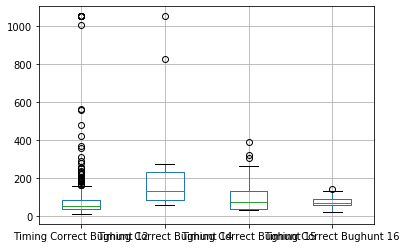

In [60]:
columns = ['Timing Correct Bughunt 12', 'Timing Correct Bughunt 14', 'Timing Correct Bughunt 15', 'Timing Correct Bughunt 16']
threshold_upper = 1050
threshold_lower = 0

for column in columns:
    data[column] = data[column].clip(upper=threshold_upper, lower=threshold_lower)
    data[column].dropna()



boxplot = data.boxplot(column=columns)

## Comparing typing performance and correctness in translating a given challeng

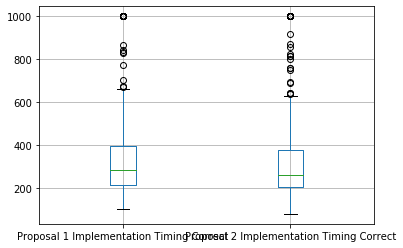

In [39]:
columns = ['Proposal 1 Implementation Timing Correct', 'Proposal 2 Implementation Timing Correct']
threshold_upper = 1000
threshold_lower = 0

for column in columns:
    data[column] = data[column].clip(upper=threshold_upper, lower=threshold_lower)
    data[column].dropna()



boxplot = data.boxplot(column=columns)

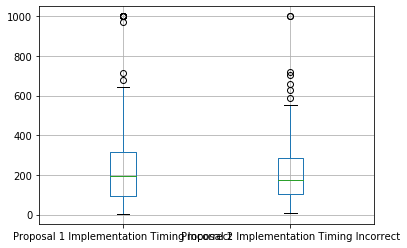

In [41]:
columns = ['Proposal 1 Implementation Timing Incorrect', 'Proposal 2 Implementation Timing Incorrect']
threshold_upper = 1000
threshold_lower = 0

for column in columns:
    data[column] = data[column].clip(upper=threshold_upper, lower=threshold_lower)
    data[column].dropna()



boxplot = data.boxplot(column=columns)